# Exercise 3

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import Image
from sklearn import svm
%matplotlib inline

Tasks: 

Your task is to classify the dataset using SVM (Support Vector Machine) for some cases given below. Generate the dataset for each case and classify using different kernels (e.g. linear, polynomial, radial basis etc.) Show the decision boundary (Plotting the classified points using different color will be enough) 

 Case 1: d = 0 

 Case 2: |d| = 1/2 * (radius of moon’s inner half-circle) and d is negative i.e. d is in the upper side of x-axis. 

 Case 3: Increase d negatively such that both of the moons touch each other. 

 Case 4: Both moons overlap each other 

 Case 5: Add some noise in the training set 

Try to experiment with different options in the SVM-labrary (change parameters). Comment on your findings. 

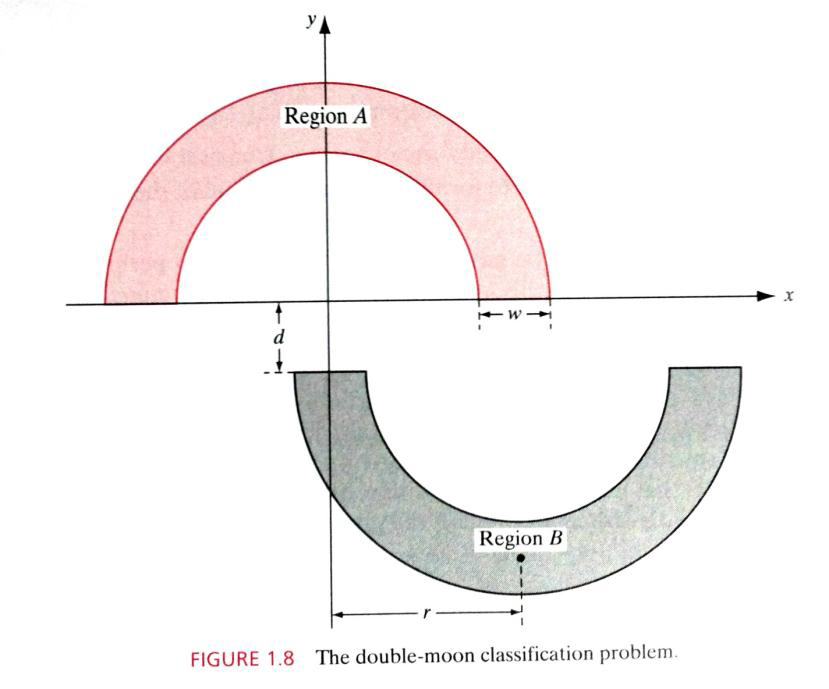

In [52]:
Image(filename='fig2.png')

In [43]:
class StateVectorMachine:
    def __init__(self,_radius,_width,_distance,_num_of_training_set,
                 _num_of_testing_set):
        self.radius = _radius
        self.width = _width
        self.distance = _distance
        self.num_of_training_set = _num_of_training_set
        self.num_of_testing_set = _num_of_testing_set
        
    def generate_sample(self,_class):
        random_theta = np.pi *  random.random()
        random_r = (self.width*random.random())+(self.radius-self.width)
        #Region one
        if _class is 1:
            x = random_r*np.cos(random_theta)
            y = random_r*np.sin(random_theta) 
            return [x,y,1]
        else:
            #Region two
            random_theta += np.pi
            x = random_r*np.cos(random_theta)+(self.radius-(self.width/2.0))
            y = random_r*np.sin(random_theta)-self.distance
            return [x,y,2]
        
    def get_samples(self,_flag):
        samples = np.empty((0,3))
        
        if _flag is "train":
            _no_of_samples = self.num_of_training_set
        else:
            _no_of_samples = self.num_of_testing_set
        
        """
        - generating number of samples 
        - half samples belongs to region A and 
          remaining half samples belongs to region B
        """
        for i in range(_no_of_samples):
            sample = self.generate_sample(1 if (i<_no_of_samples/2) else 2)
            samples = np.vstack([samples,sample])
        
        #returning samples and desired output
        return samples[:,0:2],samples[:,2:3]
    
    def plot(self,points,output,title):
        plt.grid(True)
        plt.title(title)
        plt.xlabel("x-->")
        plt.ylabel("y-->")
        for index,point in enumerate(points):
            if (output[index] == 1.0):
                plt.plot(point[0],point[1],'r+',label='region a')
            else:
                plt.plot(point[0],point[1],'b+',label='region b')

    def train(self,training_input,desired_output,_kernal):
        #trainig using support vector classifier
        classifier = svm.SVC(kernel=_kernal)
        classifier.fit(training_input, desired_output)
        return classifier
        

# Case 1: d = 0.0

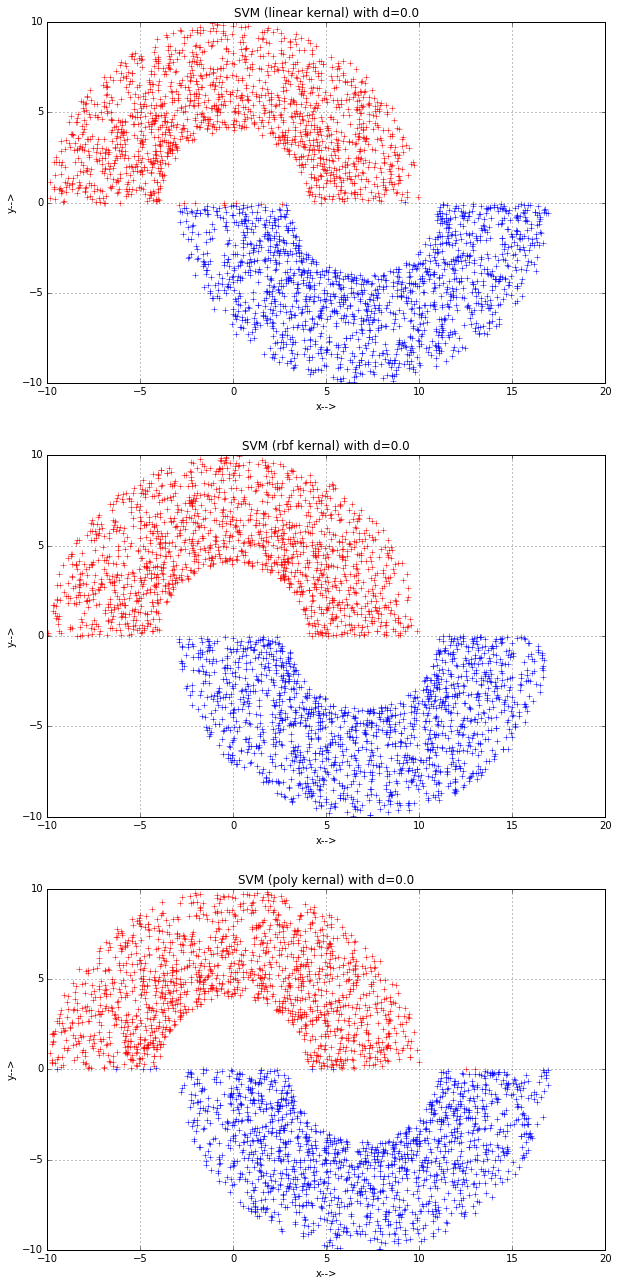

In [49]:
radius = 10.0
width = 6.0
distance = 0.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)


fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_figwidth(10)
fig.set_figheight(22)
kernals = ["linear","rbf","poly"]

for i in range(len(kernals)):
    # generating random training samples and desired output
    training_input,desired_output = state_vector_machine.get_samples("train")

    # training the state vector machine
    classifier = state_vector_machine.train(training_input,desired_output,kernals[i])

    # generating random testing samples 
    test_samples,test_desired_output = state_vector_machine.get_samples("test")

    # predicting the output for test samples and ploting the result
    predicted_output = classifier.predict(test_samples)

    plt.subplot(3, 1, i+1)

    state_vector_machine.plot(test_samples,predicted_output,"SVM ("+kernals[i]+" kernal) with d=0.0")

In case of d = 0.0, radial basis function kernal classifies the two region without any wrongly classified points. But linear and polynomial kernals classifies the regions with very few misclassified points. 

# Case 2: d = -1.0

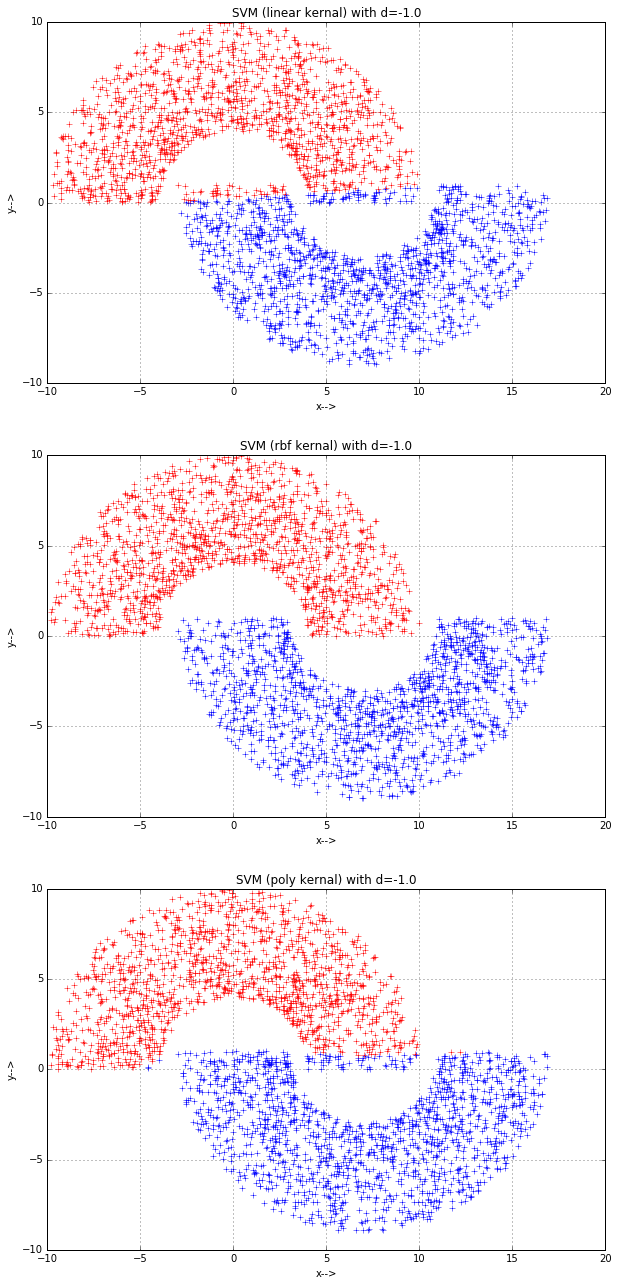

In [56]:
radius = 10.0
width = 6.0
distance = -1.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_figwidth(10)
fig.set_figheight(22)
kernals = ["linear","rbf","poly"]

for i in range(len(kernals)):
    
    # generating random training samples and desired output
    training_input,desired_output = state_vector_machine.get_samples("train")

    # training the state vector machine
    classifier = state_vector_machine.train(training_input,desired_output,kernals[i])

    # generating random testing samples 
    test_samples,test_desired_output = state_vector_machine.get_samples("test")

    # predicting the output for test samples and ploting the result
    predicted_output = classifier.predict(test_samples)
    
    plt.subplot(3, 1, i+1)
    
    state_vector_machine.plot(test_samples,predicted_output,"SVM ("+kernals[i]+" kernal) with d=-1.0")

In case of d = -1.0, again radial basis function kernal classifies the two region without any misclassified points. But linear classifies the regions with more wrongly classified points compared to previous scenario (d=0). Polynomial kernal classified region B (blue color) correctly, but there are more wrongly classified points in region A (red color) 

# Case 3: $d = (1/2*radius*(-1))$

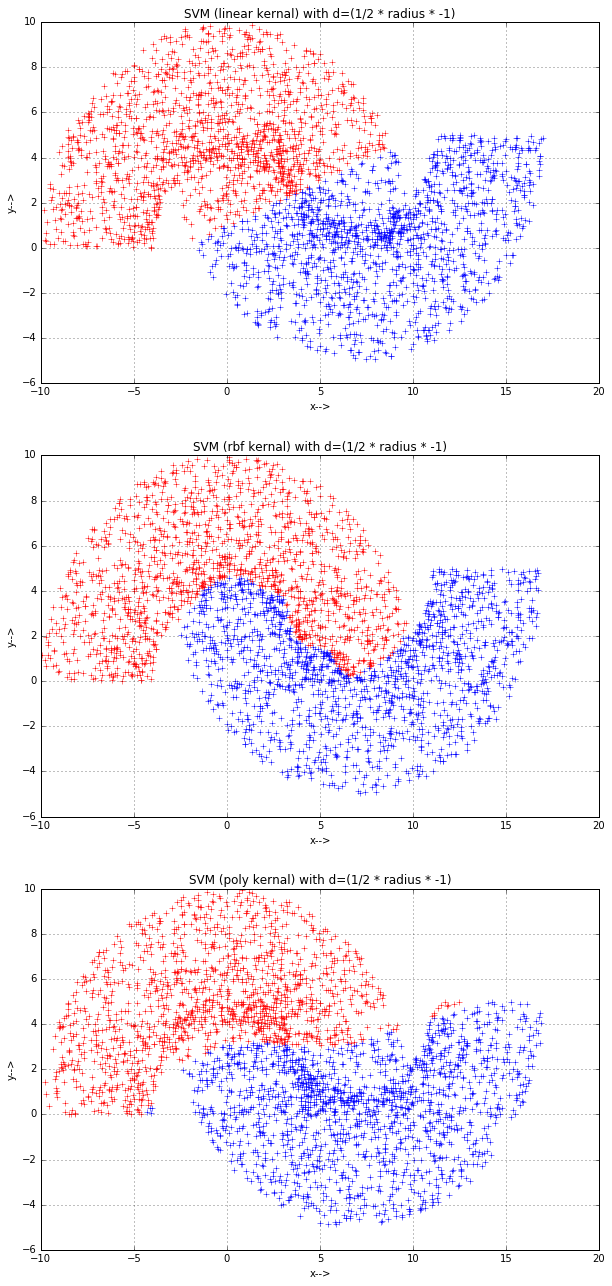

In [54]:
radius = 10.0
width = 6.0
distance = 0.5 * (radius) * -1.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_figwidth(10)
fig.set_figheight(22)
kernals = ["linear","rbf","poly"]

for i in range(len(kernals)):
    
    # generating random training samples and desired output
    training_input,desired_output = state_vector_machine.get_samples("train")

    # training the state vector machine
    classifier = state_vector_machine.train(training_input,desired_output,kernals[i])

    # generating random testing samples 
    test_samples,test_desired_output = state_vector_machine.get_samples("test")

    # predicting the output for test samples and ploting the result
    predicted_output = classifier.predict(test_samples)
    
    plt.subplot(3, 1, i+1)
    
    state_vector_machine.plot(test_samples,predicted_output,"SVM ("+kernals[i]+" kernal) with d=(1/2 * radius * -1)")

In case of $d = (1/2*radius*(-1))$, radial basis function kernal classifies the two region with very few wrongly classified points. But linear and polynomial kernals classifies the regions with more number of misclassified points compared to previous scenarios.

# Case 4: d=-10

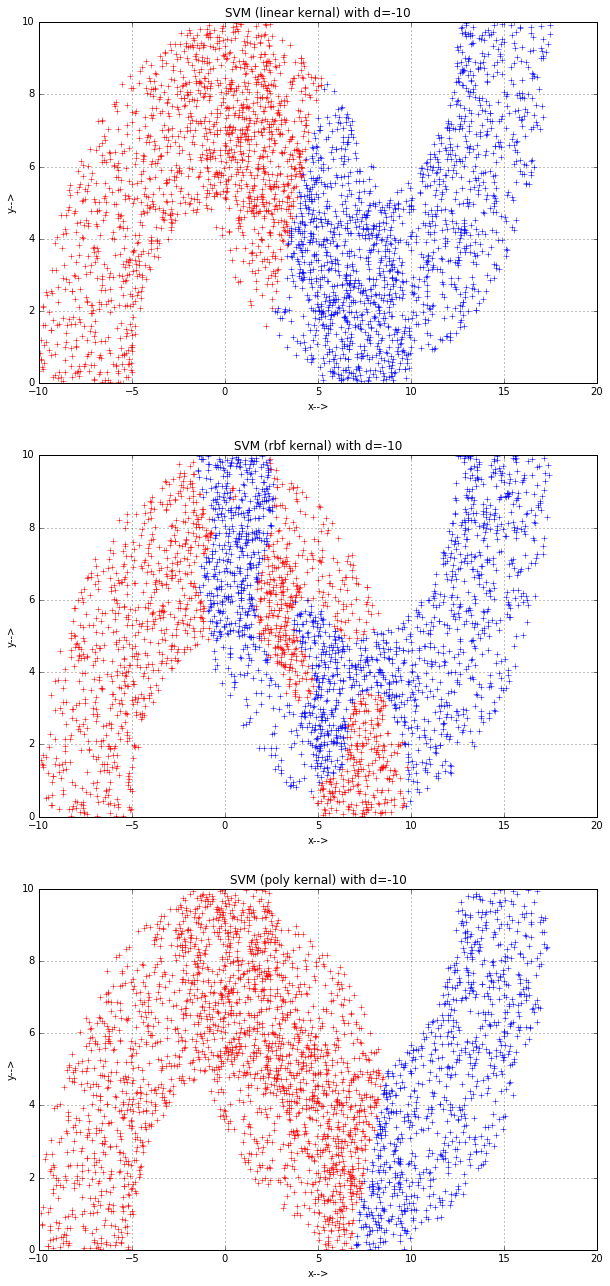

In [55]:
radius = 10.0
width = 5.0
distance = -10.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)


fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_figwidth(10)
fig.set_figheight(22)
kernals = ["linear","rbf","poly"]

for i in range(len(kernals)):
    
    # generating random training samples and desired output
    training_input,desired_output = state_vector_machine.get_samples("train")

    # training the state vector machine
    classifier = state_vector_machine.train(training_input,desired_output,kernals[i])

    # generating random testing samples 
    test_samples,test_desired_output = state_vector_machine.get_samples("test")

    # predicting the output for test samples and ploting the result
    predicted_output = classifier.predict(test_samples)
    
    plt.subplot(3, 1, i+1)
    
    state_vector_machine.plot(test_samples,predicted_output,"SVM ("+kernals[i]+" kernal) with d=-10")

In case of d = -10, all kernals classified the two regions with wrongly classified points and wrong decision boundaries.